
# MNIST Binary Classification (5 vs Not 5)

This notebook demonstrates:

1. Loading MNIST dataset
2. Converting to binary classification (Digit 5 vs Not 5)
3. Training a classifier
4. Evaluating using:
   - Cross Validation
   - Confusion Matrix
   - Precision, Recall, F1 Score
   - Precision–Recall Tradeoff
   - ROC Curve
   - ROC AUC Score

This notebook is beginner-friendly and well-commented.



# Detailed Explanation of Evaluation Metrics

## 1️⃣ Cross Validation

Cross-validation is a robust evaluation technique where the dataset is split into multiple folds (here 5 folds).
The model is trained on 4 folds and tested on the remaining fold. This process repeats 5 times.

Why use it?
- Reduces overfitting risk
- Provides more reliable accuracy
- Uses entire dataset for training and validation

Key Output:
- Mean Accuracy → Overall performance
- Standard Deviation → Model stability

---

## 2️⃣ Confusion Matrix

A confusion matrix shows how predictions compare with actual values.

Structure (Binary Classification):

|                | Predicted Negative | Predicted Positive |
|----------------|-------------------|-------------------|
| Actual Negative| True Negative (TN)| False Positive (FP)|
| Actual Positive| False Negative (FN)| True Positive (TP)|

Interpretation:
- TN → Correctly predicted non-5 digits
- TP → Correctly predicted digit 5
- FP → Incorrectly predicted 5
- FN → Missed actual 5

This helps understand the type of errors your model makes.

---

## 3️⃣ Precision, Recall, and F1 Score

### Precision
Out of all predicted positives, how many were actually correct?
Formula:
Precision = TP / (TP + FP)

High precision → Few false positives.

### Recall (Sensitivity)
Out of all actual positives, how many were detected?
Formula:
Recall = TP / (TP + FN)

High recall → Few missed positives.

### F1 Score
Harmonic mean of Precision and Recall.
Formula:
F1 = 2 × (Precision × Recall) / (Precision + Recall)

Useful when dataset is imbalanced.

---

## 4️⃣ Precision–Recall Tradeoff

Models output scores (confidence values). By changing the classification threshold:
- Increasing threshold → Precision increases, Recall decreases
- Decreasing threshold → Recall increases, Precision decreases

This curve helps choose the best threshold depending on business need.

Example:
- Medical diagnosis → High Recall preferred
- Spam detection → High Precision preferred

---

## 5️⃣ ROC Curve (Receiver Operating Characteristic)

ROC curve plots:

- X-axis → False Positive Rate (FPR)
- Y-axis → True Positive Rate (Recall)

It shows model performance across all thresholds.

The diagonal dashed line represents a random classifier.

Better models curve toward the top-left corner.

---

## 6️⃣ ROC AUC Score

AUC = Area Under the ROC Curve.

Interpretation:
- 1.0 → Perfect classifier
- 0.9–0.99 → Excellent
- 0.8–0.89 → Good
- 0.7–0.79 → Fair
- 0.5 → Random guessing

Higher AUC means better separability between classes.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings("ignore")


In [2]:

# Load MNIST dataset
mnist = fetch_openml("mnist_784", version=1)

X = mnist["data"]
y = mnist["target"].astype(np.int8)

print("Feature shape:", X.shape)
print("Label shape:", y.shape)


Feature shape: (70000, 784)
Label shape: (70000,)


In [3]:

# Convert to binary classification (5 vs Not 5)
y_binary = (y == 5)

# Train-test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y_binary[:60000], y_binary[60000:]

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 60000
Testing samples: 10000


In [4]:

# Train model
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [5]:

# Cross Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross Validation Scores: [0.95466667 0.96975    0.9635     0.96533333 0.94841667]
Mean Accuracy: 0.9603333333333334
Standard Deviation: 0.007717764500740414


In [6]:

# Confusion Matrix using cross-validation predictions
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

cm = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[53115  1464]
 [  916  4505]]


In [7]:

# Precision, Recall, F1 Score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.7547327860613168
Recall: 0.8310274857037447
F1 Score: 0.7910447761194029


In [8]:

# Decision scores for threshold analysis
y_scores = cross_val_predict(
    model,
    X_train,
    y_train,
    cv=5,
    method="decision_function"
)

print("Decision scores shape:", y_scores.shape)


Decision scores shape: (60000,)


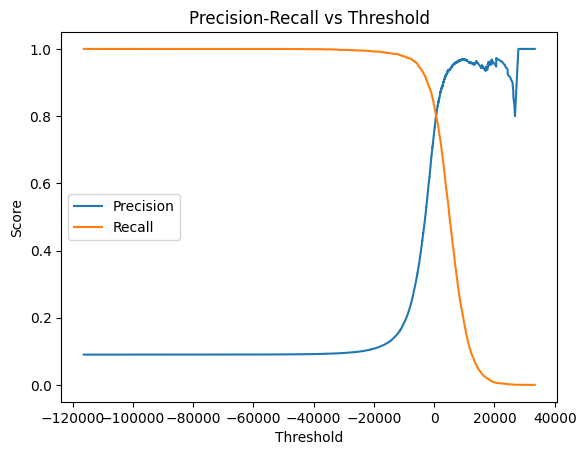

In [9]:

# Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plt.figure()
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()


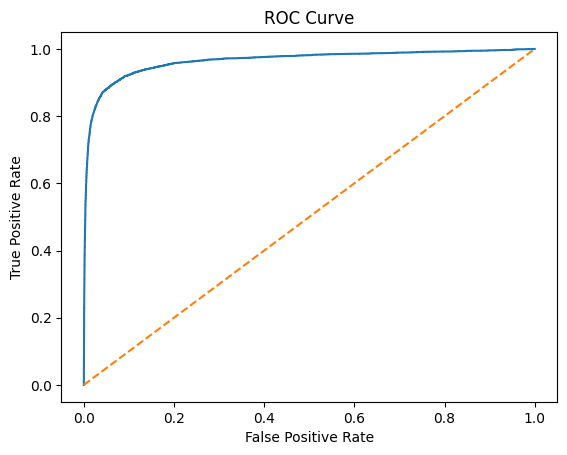

In [10]:

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [11]:

# ROC AUC Score
roc_auc = roc_auc_score(y_train, y_scores)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9648211175804801



## Summary

- Cross Validation provides stable accuracy.
- Confusion Matrix shows classification errors.
- Precision and Recall measure positive prediction performance.
- Precision–Recall tradeoff helps choose threshold.
- ROC Curve evaluates performance across thresholds.
- ROC AUC summarizes separability.

This completes the full evaluation pipeline for binary classification.
